# 01 - Time Series Analysis

In [1]:
import numpy as np

import pandas as pd
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller


In [2]:
# visual formating the graph
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use(['seaborn-whitegrid'])
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})
plt.rcParams['font.family'] = 'cambria'

In [3]:
def trend_plot(series):
    dataset= series
    dataset['Month']=series.index.month
    dataset['Year']=series.index.year
    dataset.head(1)
    sns.lineplot(x=dataset['Year'],
                 y=dataset['#Pengunjung'],
                 data=series,color='#073763ff')
    plt.xlabel("Date")
    plt.ylabel("#Pengunjung")
    plt.grid(True)
    plt.title(" Tourist Visit Trends")

def seasonal_plot(series):
    
    # Prepare data
    series['Year'] = [d.year for d in series.index]
    series['Month'] = [d.month for d in series.index]
    years = series['Year'].unique()
    
    
    np.random.seed(6)
    mycolors = ['tab:brown',
                'tab:blue',
                'tab:green',
                'tab:orange',
                'tab:red',
                'tab:purple']
    
    # Draw Plot
    for i, y in enumerate(years):
        plt.plot('Month', '#Pengunjung', 
                 data=series.loc[series['Year']==y, :], 
                 color=mycolors[i], label=y)
        plt.text(series.loc[series['Year']==y, :].shape[0]-.12, 
                 series.loc[series['Year']==y, '#Pengunjung'][:].values[0], 
                 y, color=mycolors[i])

    # Decoration
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.5)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.5)   
    plt.legend(loc='upper right', ncol=2)
    plt.gca().set(xlim=(-0.1, 12), ylim=(100, 50000), 
                  ylabel='$Number Of Tourist$', 
                  xlabel='$Month$')
    plt.yticks(alpha=0.5)
    plt.title("Seasonal Plot of Visitors in TNGMb")
    plt.show()
    
def boxplot_month_and_year_wise(series):
    # Prepare data
    series['Year'] = [d.year for d in series.index]
    series['Month'] = [d.month for d in series.index]
    years = series['Year'].unique()
    
    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
    sns.set_style(style="whitegrid")
    sns.boxplot(x='Year', y='#Pengunjung', 
                data=series, ax=axes[0], 
                palette="Blues_d")
    sns.boxplot(x='Month', y='#Pengunjung', 
                data=series.loc[~series['Year'].isin([2013, 2020]), :], 
                palette="Reds_d")
    
    # Set Title
    axes[0].set_title('Year-wise Box Plot\n(The Trend)'); 
    axes[1].set_title('Month-wise Box Plot\n(The Seasonality)')
    plt.show()

In [4]:
def parser(X):
    return pd.to_datetime(X, format = '%m-%Y')

In [5]:
# read dataset
series =  pd.read_csv('01-01 TNGMb-UnivariateData.csv', 
                      header=0, 
                      index_col=0, 
                      parse_dates = [0], 
                      date_parser = parser)

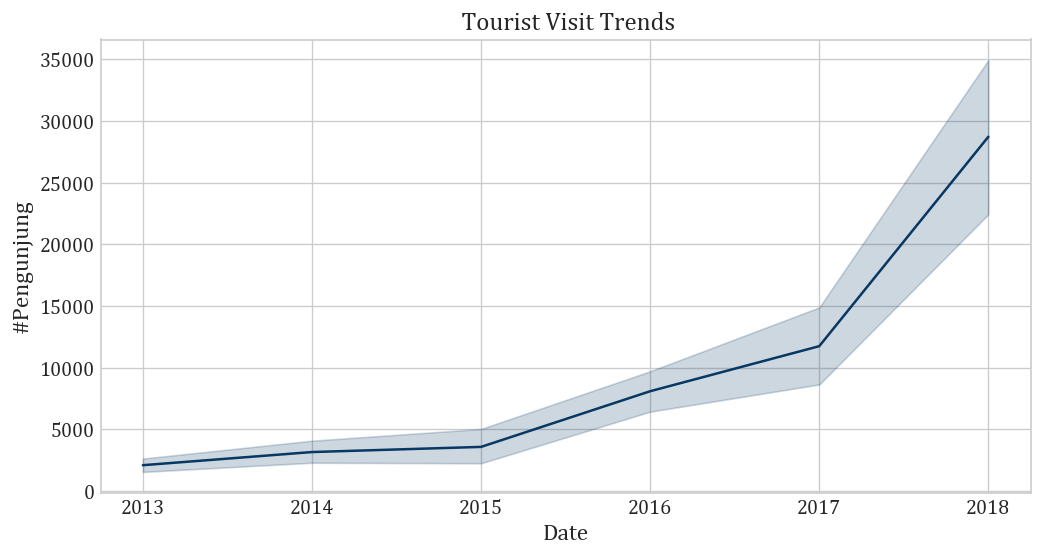

In [6]:
trend_plot(series)

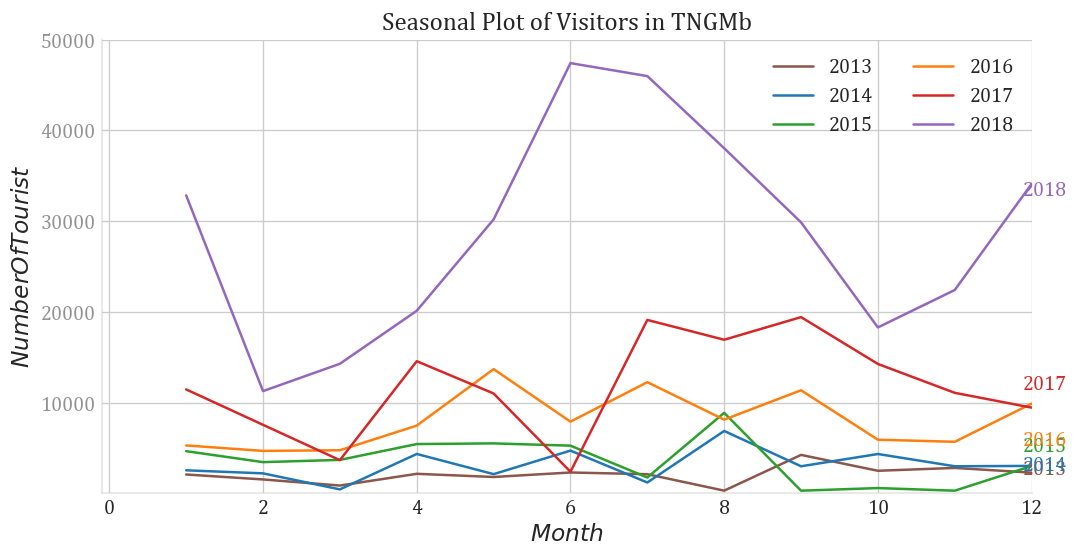

In [7]:
seasonal_plot(series)

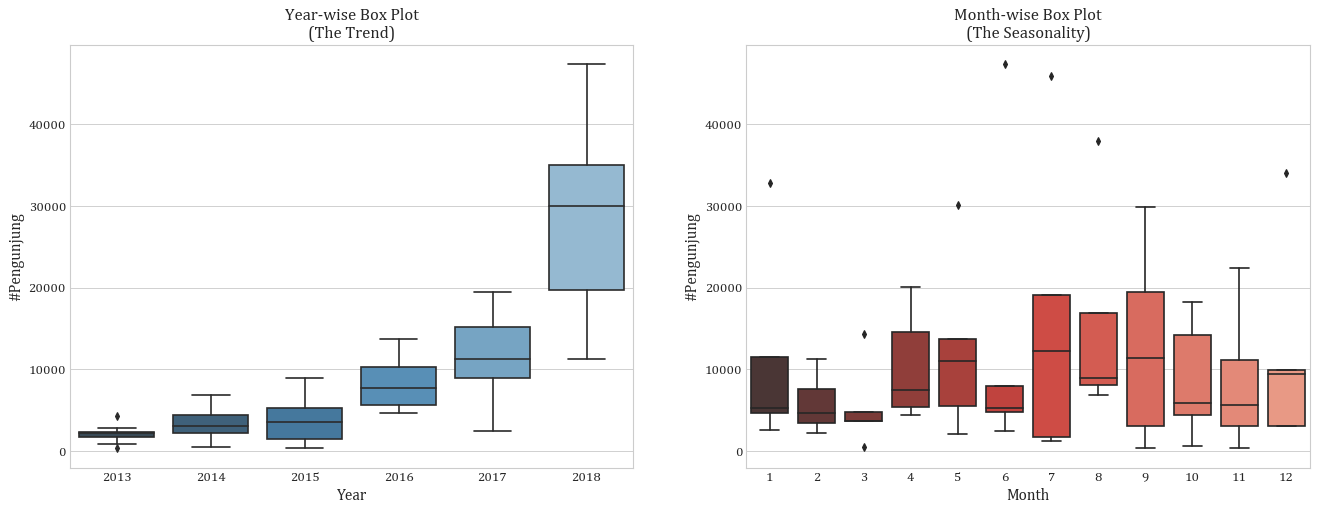

In [8]:
boxplot_month_and_year_wise(series)

In [9]:
# make date index for data point
def parser_upscaling(X):
    return pd.to_datetime(X, format = '%Y-%m-%d')

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# visualize the series
def plot_series(series, title=''):
    month = series.index
    value = series.values
    plt.plot(month , value, color = '#073763ff')
    plt.gca().set(title = title , 
                  xlabel='Time' , ylabel='#Tourist')
    plt.show()

In [10]:
# read dataset
monthly_series =  pd.read_csv('01-01 TNGMb-UnivariateData.csv', 
                      header=0, 
                      index_col=0, 
                      squeeze=True,
                      parse_dates = [0], 
                      date_parser = parser)

weekly_series =  pd.read_csv('02-02 TNGMb-Weekly.csv', 
                      header=0, 
                      index_col=0,
                      parse_dates = [0],
                      squeeze=True,
                      date_parser = parser_upscaling)

daily_series =  pd.read_csv('03-03 TNGMb-Daily.csv', 
                      header=0, 
                      index_col=0, 
                      parse_dates = [0], 
                      squeeze=True,
                      date_parser = parser_upscaling)

In [11]:
print("="*50)
print("First 5 Row","\n")
print(monthly_series.head(5),"\n")

print("="*50)
print("First 5 Row","\n")
print(weekly_series.head(5),"\n")

print("="*50)
print("First 5 Row","\n")
print(daily_series.head(5),"\n")

First 5 Row 

Bulan
2013-01-01    2084
2013-02-01    1537
2013-03-01     867
2013-04-01    2158
2013-05-01    1810
Name: #Pengunjung, dtype: int64 

First 5 Row 

date
2013-01-06    521
2013-01-13    548
2013-01-20    524
2013-01-27    464
2013-02-03    384
Name: #VisitorPerWeek, dtype: int64 

First 5 Row 

date
2013-01-01    67
2013-01-02    69
2013-01-03    70
2013-01-04    72
2013-01-05    73
Name: #VisitorPerDay, dtype: int64 



In [12]:
# Monthly time series
# unit root test, find time dependency structure 
raw_monthly_values= monthly_series.values
result_month = adfuller(raw_monthly_values, regression='c')
print('ADF Statistic: %f' % result_month[0])
print('p-value: %f' % result_month[1])
print('Critical Values:')
for key, value in result_month[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.861245
p-value: 1.000000
Critical Values:
	1%: -3.542
	5%: -2.910
	10%: -2.593


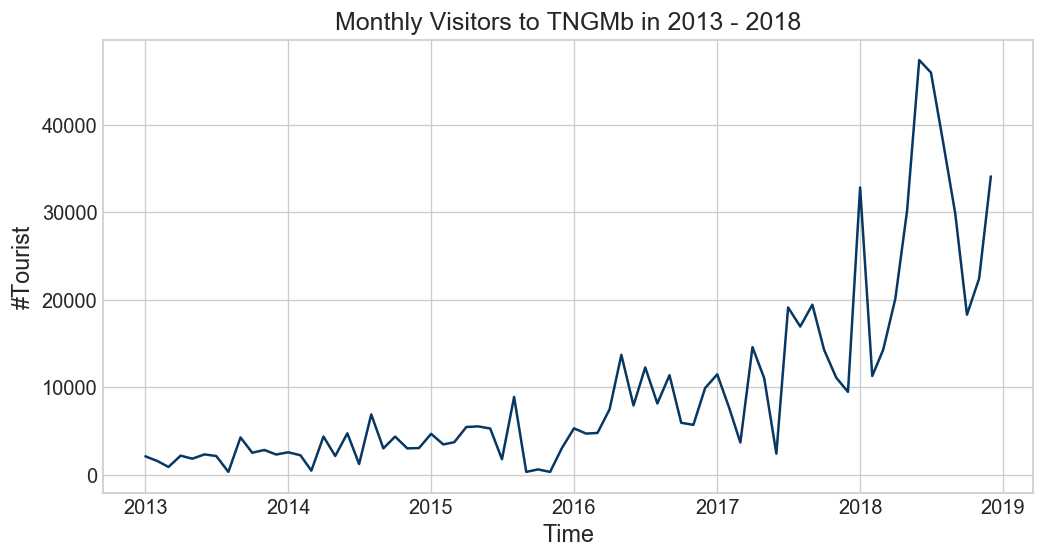

In [13]:
plot_series(monthly_series,'Monthly Visitors to TNGMb in 2013 - 2018')

In [14]:
# transform data to be stationary
X_month= difference(raw_monthly_values, 1)
result_month = adfuller(X_month, regression='c')
print('ADF Statistic: %f' % result_month[0])
print('p-value: %f' % result_month[1])
print('Critical Values:')
for key, value in result_month[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.915892
p-value: 0.000000
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591


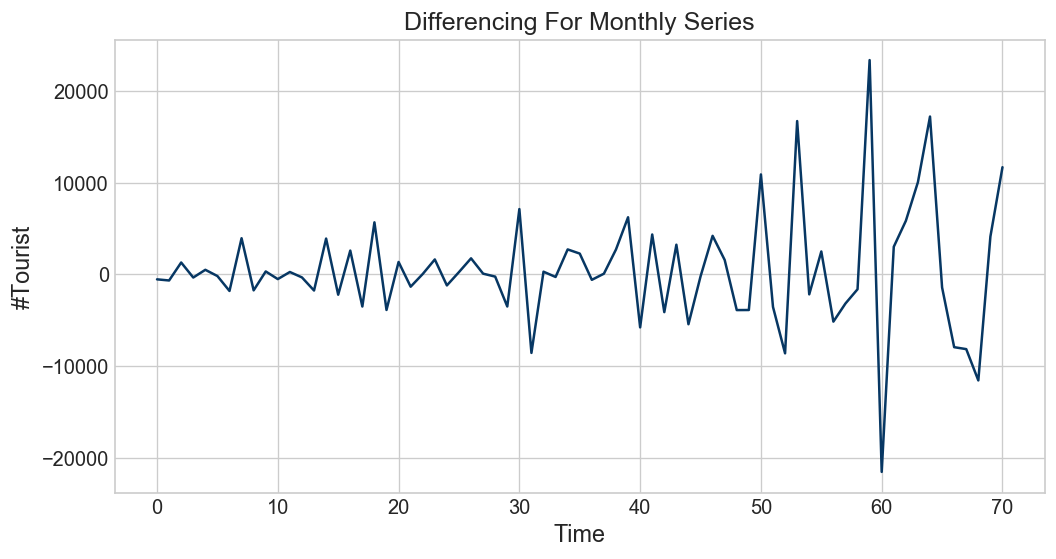

In [15]:
plot_series(X_month,'Differencing For Monthly Series')

In [16]:
# Weekly time series
# unit root test, find time dependency structure 
raw_weekly_values= weekly_series.values
result_week = adfuller(raw_weekly_values, regression='c')
print('ADF Statistic: %f' % result_week[0])
print('p-value: %f' % result_week[1])
print('Critical Values:')
for key, value in result_week[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.509026
p-value: 0.890243
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


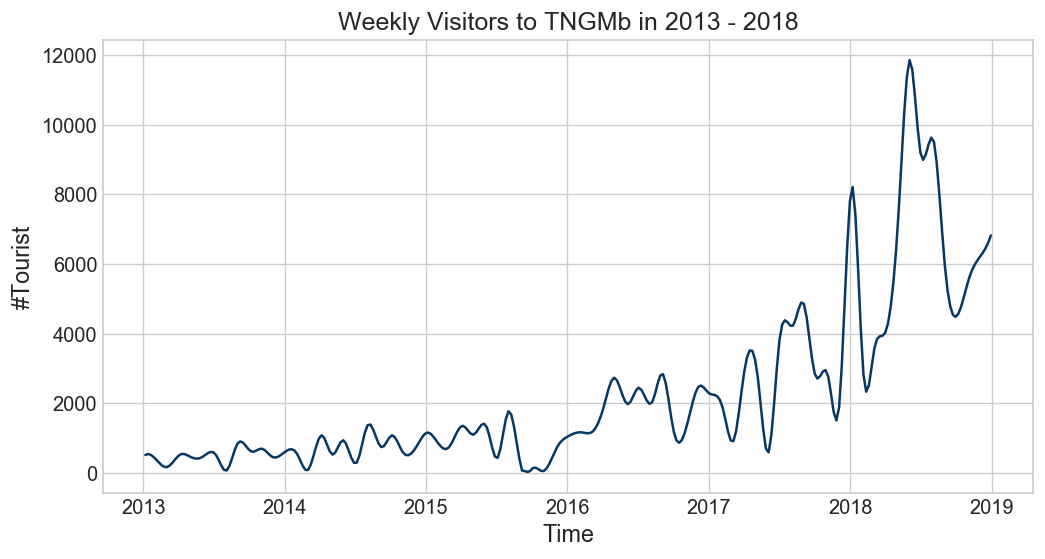

In [17]:
plot_series(weekly_series,'Weekly Visitors to TNGMb in 2013 - 2018')

In [18]:
# transform data to be stationary
X_week= difference(raw_weekly_values, 1)
result_week = adfuller(X_week, regression='c')
print('ADF Statistic: %f' % result_week[0])
print('p-value: %f' % result_week[1])
print('Critical Values:')
for key, value in result_week[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.229680
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


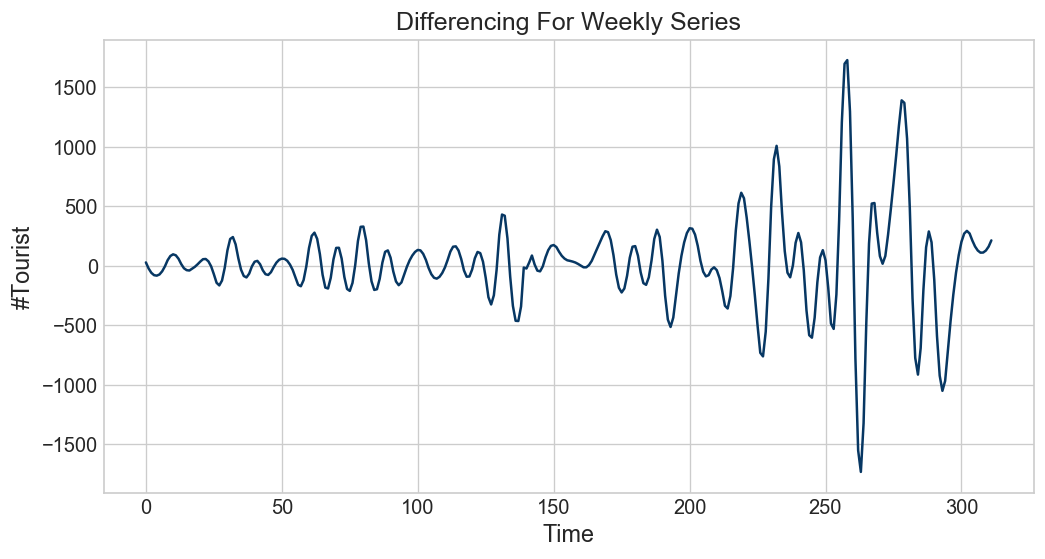

In [19]:
plot_series(X_week,'Differencing For Weekly Series')

In [20]:
# Daily time series
# unit root test, find time dependency structure 
raw_daily_values= daily_series.values
result_daily = adfuller(raw_daily_values, regression='c')
print('ADF Statistic: %f' % result_daily[0])
print('p-value: %f' % result_daily[1])
print('Critical Values:')
for key, value in result_daily[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.573549
p-value: 0.496865
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


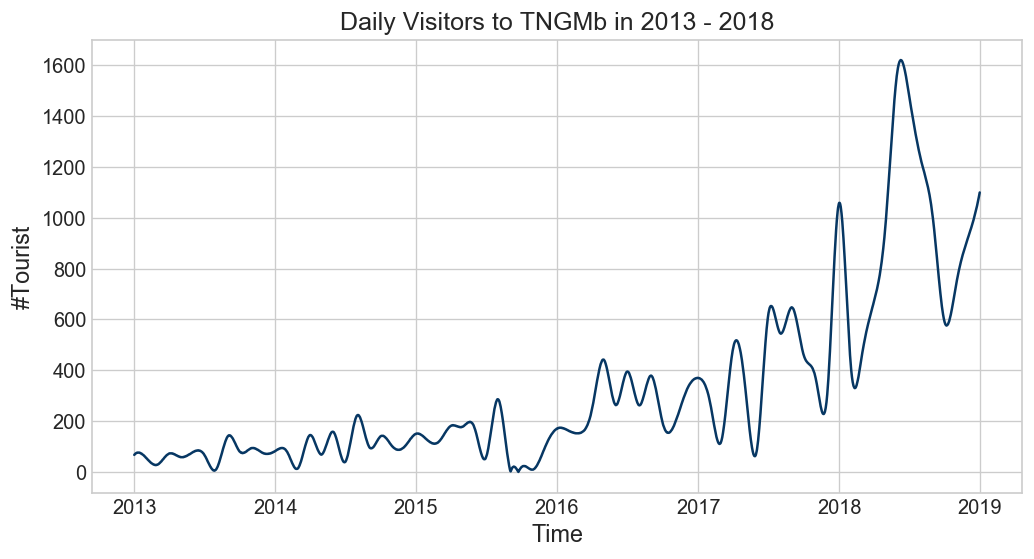

In [21]:
plot_series(daily_series,'Daily Visitors to TNGMb in 2013 - 2018')

In [22]:
# transform data to be stationary
X_day= difference(raw_daily_values, 1)
result_daily = adfuller(X_week,regression='ct')
print('ADF Statistic: %f' % result_daily[0])
print('p-value: %f' % result_daily[1])
print('Critical Values:')
for key, value in result_daily[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.265879
p-value: 0.000000
Critical Values:
	1%: -3.989
	5%: -3.425
	10%: -3.136


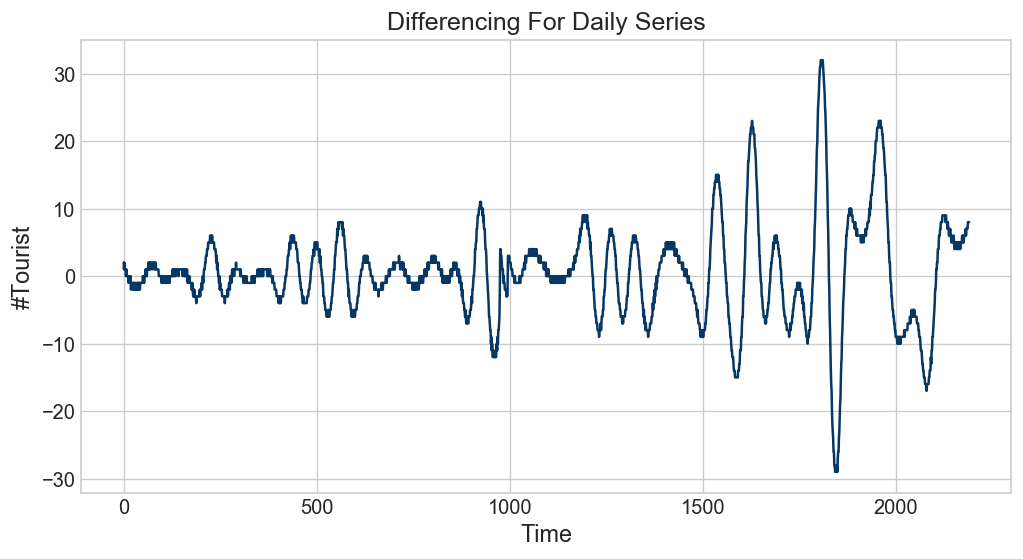

In [23]:
plot_series(X_day,'Differencing For Daily Series')